In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [7]:
df=pd.read_csv('online_retail_II.csv', encoding='unicode_escape')

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [10]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [11]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [12]:
df_clean=df.copy()

In [13]:
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [14]:
df_clean=df_clean.dropna(subset=["Customer ID"])

In [16]:
df_clean.shape

(824364, 8)

In [17]:
df_clean=df_clean[df_clean["Quantity"]>0]
df_clean=df_clean[df_clean["Price"]>0]
df_clean=df_clean[~df_clean["Invoice"].astype(str).str.startswith("C")]

In [18]:
df_clean.shape

(805549, 8)

In [20]:
df_clean["TotalAmount"] = df_clean["Quantity"]*df_clean["Price"]

In [22]:
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [24]:
df_clean["InvoiceDate"]=pd.to_datetime(df_clean["InvoiceDate"])
df_clean["Date"]=df_clean["InvoiceDate"].dt.date
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [25]:
total_sales=df_clean["TotalAmount"].sum()
unique_customers=df_clean["Customer ID"].nunique()

In [26]:
unique_products = df_clean["StockCode"].nunique()
total_orders = df_clean["Invoice"].nunique()

print("Total Revenue =", round(total_sales,2))
print("Total Orders =", total_orders)
print("Unique Customers =", unique_customers)
print("Unique Products =", unique_products)

Total Revenue = 17743429.18
Total Orders = 36969
Unique Customers = 5878
Unique Products = 4631


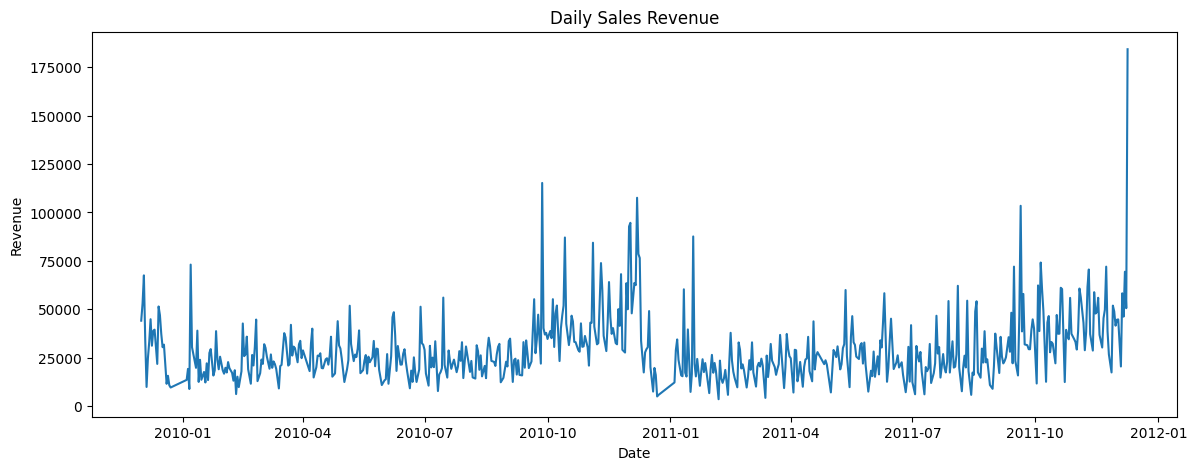

In [32]:
daily=df_clean.groupby("Date")["TotalAmount"].sum()

plt.figure(figsize=(14,5))
plt.plot(daily.index, daily.values)
plt.title("Daily Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [33]:
daily.head()

Date
2009-12-01    44048.69
2009-12-02    52941.99
2009-12-03    67479.08
2009-12-04    34064.41
2009-12-05     9803.05
Name: TotalAmount, dtype: float64

In [34]:
df_clean["YearMonth"]=df_clean["InvoiceDate"].dt.to_period("M").astype(str)

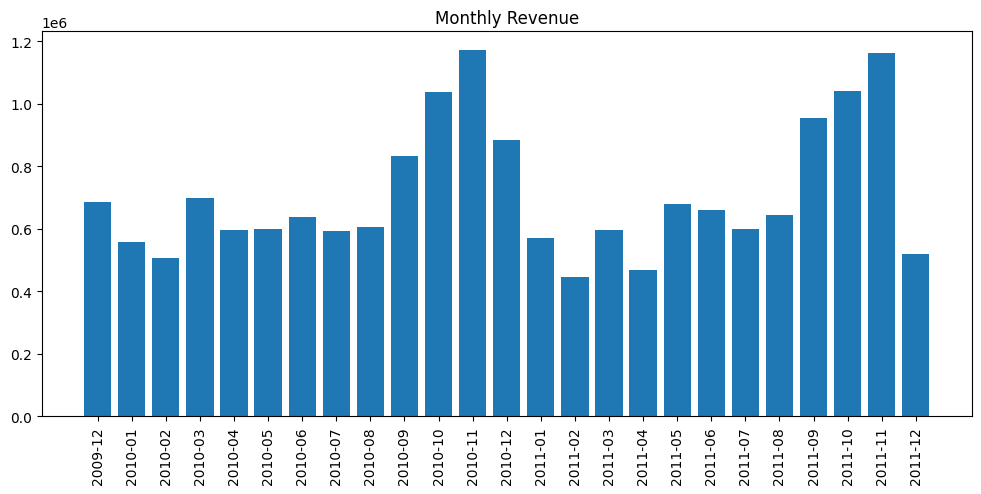

In [36]:
monthly=df_clean.groupby("YearMonth")["TotalAmount"].sum()

plt.figure(figsize=(12,5))
plt.bar(monthly.index, monthly.values)
plt.xticks(rotation=90)
plt.title("Monthly Revenue")
plt.show()

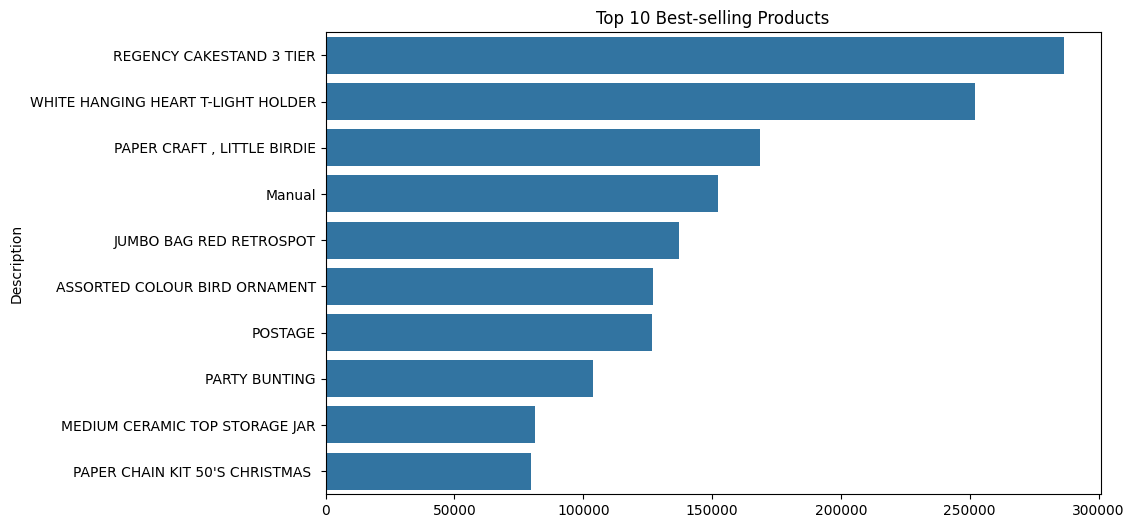

In [41]:
top_products=(df_clean.groupby("Description")["TotalAmount"].sum().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values,y=top_products.index)
plt.title("Top 10 Best-selling Products")
plt.show()

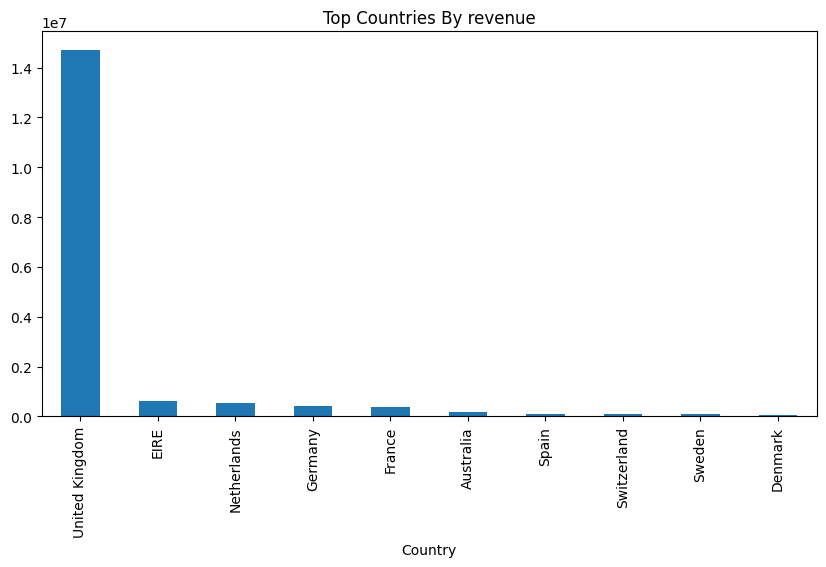

In [42]:
country_sales=(df_clean.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False))

country_sales.head(10).plot(kind="bar",figsize=(10,5))
plt.title("Top Countries By revenue")
plt.show()

In [46]:
customer_value=(df_clean.groupby("Customer ID")["TotalAmount"].sum().sort_values(ascending=False))

customer_value.head(10)

Customer ID
18102.0    608821.65
14646.0    528602.52
14156.0    313946.37
14911.0    295972.63
17450.0    246973.09
13694.0    196482.81
17511.0    175603.55
16446.0    168472.50
16684.0    147142.77
12415.0    144458.37
Name: TotalAmount, dtype: float64

In [47]:
df_clean.to_csv("online_retail_cleaned.csv", index=False)
print("Saved cleaned dataset as online_retail_cleaned.csv")

Saved cleaned dataset as online_retail_cleaned.csv


In [2]:
from sqlalchemy import create_engine
import urllib

DB_USER = "root"
DB_PASS = "YOUR_PASSWORD"
DB_HOST = "localhost"
DB_NAME = "retail_db"

DB_PASS_URL = urllib.parse.quote_plus(DB_PASS)

engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS_URL}@{DB_HOST}/{DB_NAME}")
engine


ModuleNotFoundError: No module named 'sqlalchemy'